# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv', sep=',')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names.shape[0]
print(type(baby_names))
print(type(baby_names[baby_names.columns[1]]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [5]:
baby_names = baby_names.drop(['Unnamed: 0', 'Id'], axis=1)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
baby_names['Gender'].value_counts()
# Kobiet

F    558846
M    457549
Name: Gender, dtype: int64

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [8]:
m = baby_names[baby_names['Gender'] == 'M']
f = baby_names[baby_names['Gender'] == 'F']
res1 = baby_names['Name'].value_counts().head(10)
res2 = m['Name'].value_counts().head(10)
res3 = f['Name'].value_counts().head(10)

In [9]:
res1

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

C:\Users\jakub\AppData\Local\Temp\ipykernel_32640\323952393.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(res1.index, rotation=90)
C:\Users\jakub\AppData\Local\Temp\ipykernel_32640\323952393.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(res2.index, rotation=90)
C:\Users\jakub\AppData\Local\Temp\ipykernel_32640\323952393.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(res3.index, rotation=90)


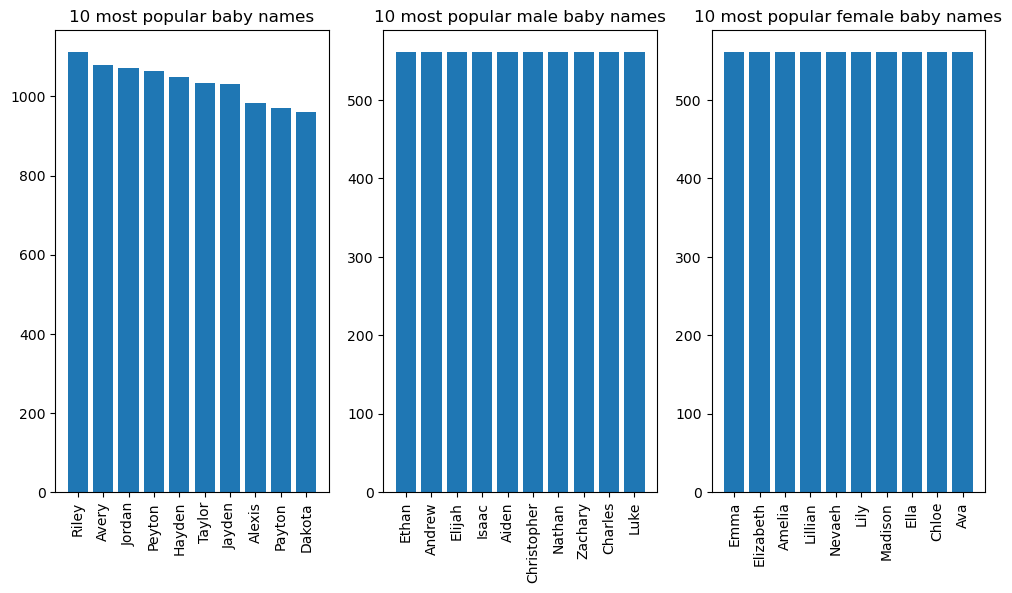

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].bar(x=res1.index, height=res1.values)
ax[0].set_title("10 most popular baby names")
ax[0].set_xticklabels(res1.index, rotation=90)

ax[1].bar(x=res2.index, height=res2.values)
ax[1].set_title("10 most popular male baby names")
ax[1].set_xticklabels(res2.index, rotation=90)

ax[2].bar(x=res3.index, height=res3.values)
ax[2].set_title("10 most popular female baby names")
ax[2].set_xticklabels(res3.index, rotation=90)

plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [11]:
len(baby_names['Name'].unique())

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [13]:
x = baby_names['Name'].value_counts()
x.sample(weights=(x.values/len(baby_names)))

Annaleigh    86
Name: Name, dtype: int64

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [17]:
print(x.head(1).index[0])
print(x.describe()[['mean','50%','std']])

Riley
mean     57.644907
50%       8.000000
std     122.029964
Name: Name, dtype: float64


## Część II

Krok 1: Wczytaj dane

In [18]:
occupation = pd.read_csv('lab12_files/ocupation.csv',sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [19]:
occupation.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [20]:
occupation.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [21]:
print(f'{occupation.shape[0]} obserwacji i {occupation.shape[1]} kolumn')

943 obserwacji i 5 kolumn


Krok 5: Wypisz nazwy kolumn

In [22]:
occupation.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [23]:
len(occupation['occupation'].unique())

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

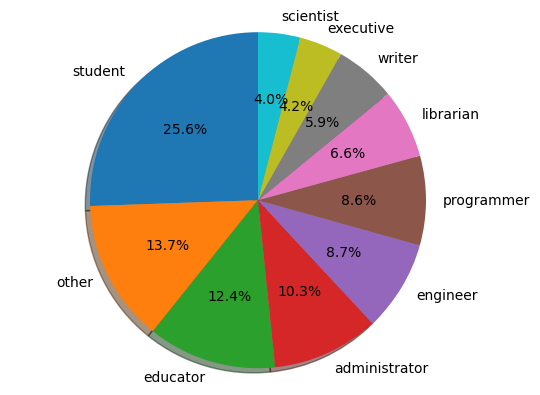

In [24]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = occupation['occupation'].value_counts().head(10).index
sizes = occupation['occupation'].value_counts().head(10).values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'student'),
  Text(1, 0, 'other'),
  Text(2, 0, 'educator'),
  Text(3, 0, 'administrator'),
  Text(4, 0, 'engineer'),
  Text(5, 0, 'programmer'),
  Text(6, 0, 'librarian'),
  Text(7, 0, 'writer'),
  Text(8, 0, 'executive'),
  Text(9, 0, 'scientist')])

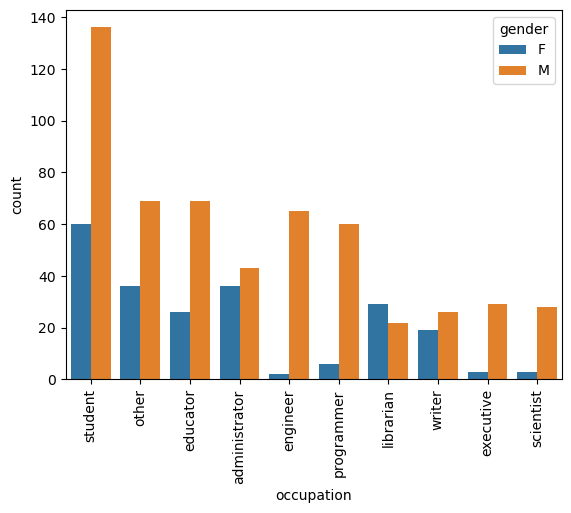

In [25]:
import seaborn as sns
res = occupation[occupation['occupation'].isin(occupation['occupation'].value_counts().head(10).index)]
sns.countplot(data=res,x='occupation',hue='gender',order=res['occupation'].value_counts().index)
plt.xticks(rotation=90)

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

C:\Users\jakub\AppData\Local\Temp\ipykernel_32640\1231366573.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ave = pd.DataFrame(occupation.groupby('occupation').mean()['age']).reset_index()


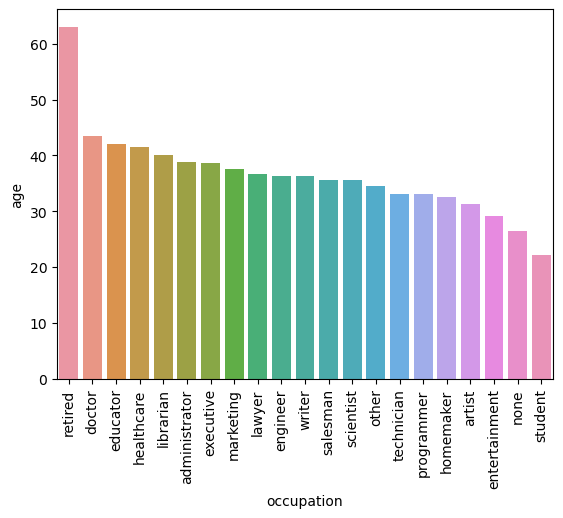

In [26]:
ave = pd.DataFrame(occupation.groupby('occupation').mean()['age']).reset_index()
sns.barplot(data=ave,x='occupation',y='age',order=ave.sort_values(by='age',ascending=False)['occupation'])
plt.xticks(rotation=90)
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

C:\Users\jakub\AppData\Local\Temp\ipykernel_32640\3038911684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  man = occupation[occupation['gender']=='M'].groupby(['occupation'], as_index=False).mean()[['occupation','age']]
C:\Users\jakub\AppData\Local\Temp\ipykernel_32640\3038911684.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  woman = occupation[occupation['gender']=='F'].groupby(['occupation'], as_index=False).mean()[['occupation','age']]


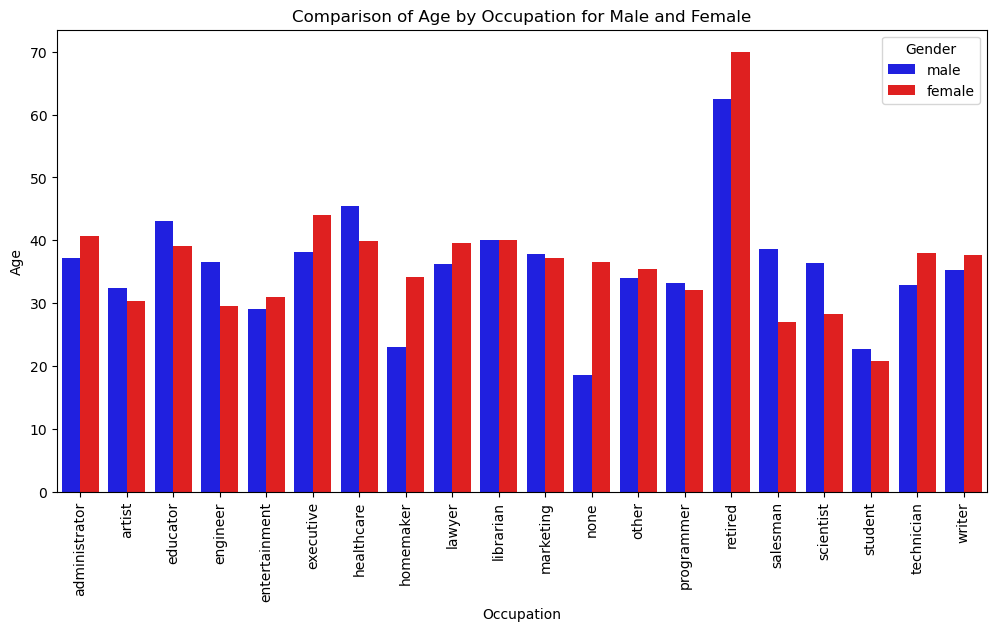

In [27]:
man = occupation[occupation['gender']=='M'].groupby(['occupation'], as_index=False).mean()[['occupation','age']]
woman = occupation[occupation['gender']=='F'].groupby(['occupation'], as_index=False).mean()[['occupation','age']]
both = pd.merge(man, woman, on='occupation')

# Melt the DataFrame to make it suitable for Seaborn
melted = both.melt(id_vars='occupation', var_name='gender', value_name='age')

# Rename the columns to 'male' and 'female'
melted['gender'] = melted['gender'].map({'age_x': 'male', 'age_y': 'female'})

# Create a bar plot with 'hue' to distinguish between male and female
plt.figure(figsize=(12, 6))
sns.barplot(x='occupation', y='age', hue='gender', data=melted, palette={'male': 'blue', 'female': 'red'})
plt.title('Comparison of Age by Occupation for Male and Female')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()